In [1]:
import os
os.environ['NUMPY_EXPERIMENTAL_ARRAY_FUNCTION'] = '0'

from matplotlib import pyplot as plt
import numpy as np
import xarray as xr
import gcsfs


%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 6
%config InlineBackend.figure_format = 'retina' 

In [2]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/pangeo-cmip6/pangeo-cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
0,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,pr,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
1,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,prsn,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
2,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tas,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
3,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tasmax,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
4,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tasmin,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN


In [3]:
df_theta = df[(df.table_id == 'Omon') & (df.variable_id == 'thetao')]
uri = df_theta[(df_theta.source_id == 'SAM0-UNICON') &
                         (df_theta.experiment_id == 'historical')].zstore.values[0]
gcs = gcsfs.GCSFileSystem(token='anon')
ds_theta = xr.open_zarr(gcs.get_mapper(uri), consolidated=True)
df_v = df[(df.table_id == 'Omon') & (df.variable_id == 'vo')]
uri = df_v[(df_v.source_id == 'SAM0-UNICON') &
                         (df_v.experiment_id == 'historical')].zstore.values[0]
gcs = gcsfs.GCSFileSystem(token='anon')
ds_v = xr.open_zarr(gcs.get_mapper(uri), consolidated=True)
#run_counts = df_v.groupby(['source_id', 'experiment_id'])['zstore'].count()
#run_counts

In [4]:
def finegrid_metrics(levs,lev_bnds):
    drF=np.diff(lev_bnds,axis=1)
    drC=np.concatenate((np.array([levs[0]]),np.diff(levs,axis=0),np.array([lev_bnds[-1,-1]-levs[-1]])))
    return(drF,drC)

In [5]:
fine_drf,fine_drc=finegrid_metrics(ds_theta.lev.values,ds_theta.lev_bnds.values)
fine_drc.size

61

In [6]:
import finegrid
print(finegrid.finegrid(np.squeeze(fine_drf),np.squeeze(fine_drc),[fine_drf.size,10]))#np.squeeze(fine_drf).T,

(array([0.16666667, 0.16666667, 0.16666667, ..., 4.1662083 , 4.1662083 ,
       4.1662083 ], dtype=float32), array([ 1,  1,  1, ..., 59, 59, 59], dtype=int32), array([1., 1., 1., ..., 0., 0., 0.], dtype=float32))


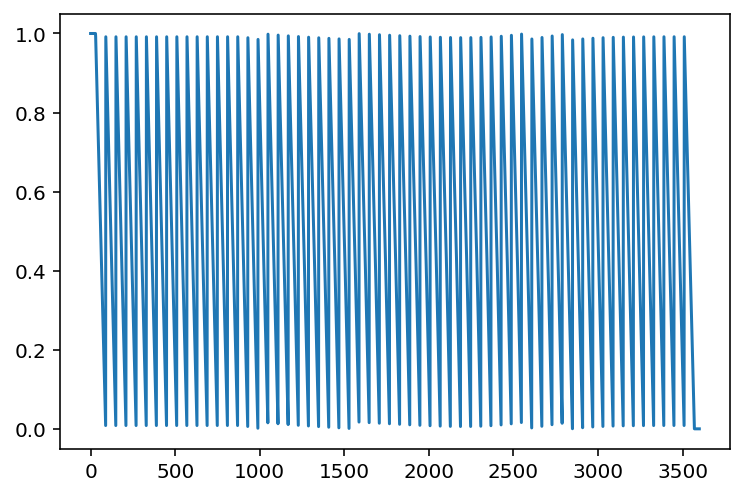

In [7]:
drf_finer,mapindex,mapfact=finegrid.finegrid(np.squeeze(fine_drf),np.squeeze(fine_drc),[fine_drf.size,10])
plt.plot(mapfact)

In [8]:
import layers
thetalayers=np.linspace(4,21,80)
#ds_v.vo[10,:,100,100].values[0:40],ds_theta.thetao[10,:,100,100].values[0:40],
VH=layers.layers_1(ds_theta.thetao[10,:,100,100].values[0:40],thetalayers,mapfact,mapindex)
VH

array([40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40.], dtype=float32)

In [10]:
print(layers.layers_1.__doc__)

vh = layers_1(tracer,layers_bounds,mapfact,mapindex,[nz,nlayers,nzz])

Wrapper for ``layers_1``.

Parameters
----------
tracer : input rank-1 array('f') with bounds (nz)
layers_bounds : input rank-1 array('f') with bounds (nlayers)
mapfact : input rank-1 array('f') with bounds (nzz)
mapindex : input rank-1 array('i') with bounds (nzz)

Other Parameters
----------------
nz : input int, optional
    Default: len(tracer)
nlayers : input int, optional
    Default: len(layers_bounds)
nzz : input int, optional
    Default: len(mapfact)

Returns
-------
vh : rank-1 array('f') with bounds (nlayers)



In [ ]:
print(finegrid.finegrid.__doc__)

In [ ]:
mapfact.size